In [2]:
import statsmodels.tsa.stattools as tsa
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## 1. Work on some simulated data

In [10]:
# load data 
df = pd.read_csv('../data/module3_data_Simulated_ARMA.csv')
print df.dtypes

dateid01     object
dateid       object
y           float64
z           float64
dtype: object


In [11]:
## index our time series index, like tsset in stata
df['time'] = pd.to_datetime(df.dateid01)
df.index = df.time
df.dtypes

## or we can use something like this if date string is not formated correctly
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# data["t_month"] = data["Month"].apply(dateparse)

dateid01            object
dateid              object
y                  float64
z                  float64
time        datetime64[ns]
dtype: object

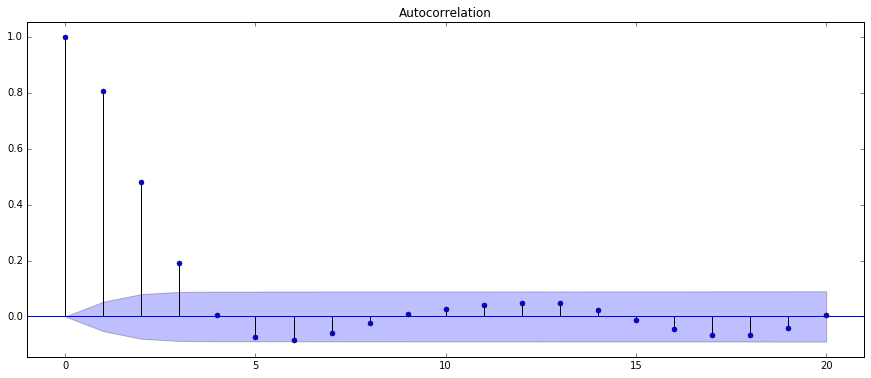

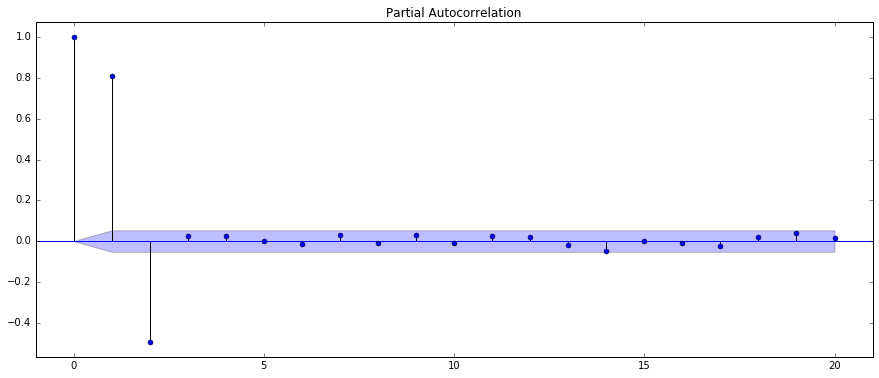

In [12]:
acf = sm.graphics.tsa.plot_acf(df.y,lags = 20)
pacf = sm.graphics.tsa.plot_pacf(df.y,lags = 20)
## looks very much like ar1 

In [21]:
## take a look at the model results with AR1 
ar1_model = tsa.ARMA(df.y,(1,0))
ar1_result = ar1_model.fit() 
print ar1_result.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1382
Model:                     ARMA(1, 0)   Log Likelihood               -2133.221
Method:                       css-mle   S.D. of innovations              1.132
Date:                Wed, 28 Sep 2016   AIC                           4272.442
Time:                        19:48:23   BIC                           4288.135
Sample:                    01-01-1900   HQIC                          4278.312
                         - 02-01-2015                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0711      0.158      0.449      0.654        -0.239     0.382
ar.L1.y        0.8083      0.016     51.159      0.000         0.777     0.839
                                    Roots           

In [22]:
## take a look at residual 
resid = ar1_result.resid
acf = tsa.acf(resid, qstat=True, fft=True, alpha=True)
acf_pd = pd.DataFrame(list(acf)).T
acf_pd.columns = ['acf','confint','qstat','pvalues']
print acf_pd.head(13)

            acf                                 confint    qstat      pvalues
0             1                              [1.0, 1.0]  222.009  3.29792e-50
1      0.400368        [0.400368393729, 0.400368393729]  222.897  3.96798e-49
2    -0.0253134      [-0.025313375037, -0.025313375037]  297.231  3.95386e-64
3     -0.231502      [-0.231501984396, -0.231501984396]  382.954  1.33993e-81
4     -0.248513      [-0.248513295568, -0.248513295568]  420.782  9.82626e-89
5     -0.165026      [-0.165026370135, -0.165026370135]  434.263  1.19492e-90
6    -0.0984818    [-0.0984818272282, -0.0984818272282]  434.962  7.52087e-90
7    -0.0224049    [-0.0224049230202, -0.0224049230202]  434.963   6.1542e-89
8   0.000894286  [0.000894285907579, 0.000894285907579]  436.274  2.46166e-88
9     0.0306795      [0.0306794842706, 0.0306794842706]  436.971  1.25405e-87
10    0.0223697      [0.0223696721467, 0.0223696721467]  437.132  7.87349e-87
11     0.010739      [0.0107389930102, 0.0107389930102]  438.422

## 2. Work on some real word data